# INFO 3402 – Week 12: Scatterplots

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

## Setup

In [1]:
import numpy as np

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 200

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sb
from scipy import stats

## Background

Previous modules have explored the relationship in a single continuous variable (histograms), the relationship between continuous and categorial variables (catplots), and time series are a special kind of continuous data (line plots). This module will explore the relationship between two continuous variables and its corresponding visualization: the scatterplot.

### Dataset

In the Appendix you can see how I've joined several county-level datasets together to make the `counties_df` DataFrame. The data includes 2020 U.S. Census estimates ([source](https://data.census.gov/cedsci/table?d=ACS%205-Year%20Estimates%20Data%20Profiles)) about social characteristics (DP02 table), economic characteristics (DP03 table), and demographic characteristics (DP05 table). I've also included columns that represent the share (percentage) of votes cast for Donald Trump in the 2016 and 2020 elections ([source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)) as well as the "shift" in share from 2016 to 2020. Finally, I've included statistics about the number of COVID-19 cases and deaths from *The New York Times* ([source](https://github.com/nytimes/covid-19-data)).

In [2]:
counties_df = pd.read_csv('us_counties.csv',dtype={0:str},na_values=['-'])
counties_df.rename(columns={'Unnamed: 0':'FIPS'},inplace=True)
counties_df.set_index('FIPS',inplace=True)
print(counties_df.shape)
counties_df.head()

(3297, 33)


,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,72.8,71.4,-1.4,Alabama,Autauga,15582.0,210.0,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982.0,10.6,92.0,12.7,55639.0,23.6,15.3,51.4,78.0,2.9,98.7,0.280055,0.003774
01003,76.5,76.2,-0.3,Alabama,Baldwin,55327.0,669.0,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756.0,6.9,90.5,6.3,218289.0,21.5,20.5,51.5,87.9,4.6,98.1,0.253458,0.003065
01005,52.1,53.5,1.4,Alabama,Barbour,5467.0,94.0,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990.0,24.3,89.3,23.8,25026.0,20.9,19.1,47.4,47.9,4.4,98.3,0.218453,0.003756
01007,76.4,78.4,2.0,Alabama,Bibb,6411.0,100.0,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721.0,18.5,90.9,17.0,22374.0,20.5,16.4,46.3,77.1,2.7,98.8,0.286538,0.004469
01009,89.3,89.6,0.3,Alabama,Blount,14889.0,230.0,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922.0,10.5,90.0,10.1,57755.0,23.2,18.0,50.3,96.2,9.3,96.8,0.257796,0.003982


Let's filter the counties to just the 64 in Colorado.

In [3]:
co_counties = counties_df.copy()[counties_df['state'] == 'Colorado']

print(co_counties.shape)

co_counties.head()

(64, 33)


,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
08001,41.4,40.4,-1.0,Colorado,Adams,132138.0,1315.0,22.9,29.0,25.2,6.9,10.9,84.2,51.8,20.7,70.2,72.1,88.3,0.1,4.1,73817.0,8.4,89.7,7.4,509844.0,26.5,10.5,49.5,84.3,40.4,88.3,0.259173,0.002579
08003,43.9,48.8,4.9,Colorado,Alamosa,4480.0,60.0,27.4,28.2,24.5,5.5,17.6,82.5,60.9,9.4,87.1,72.3,78.9,0.0,6.9,41121.0,21.6,88.7,14.0,16153.0,24.2,13.9,50.6,86.1,47.1,93.9,0.277348,0.003714
08005,38.6,36.4,-2.2,Colorado,Arapahoe,150770.0,1240.0,25.6,20.4,43.4,7.7,9.6,82.5,40.7,25.7,37.9,76.7,91.8,0.4,4.4,80291.0,6.1,92.1,5.2,649980.0,23.5,13.1,50.4,75.2,19.5,90.5,0.231961,0.001908
08007,58.1,56.7,-1.4,Colorado,Archuleta,2851.0,15.0,19.5,21.2,39.7,9.7,15.5,89.7,31.3,18.8,52.6,92.6,85.7,0.1,4.3,55658.0,6.3,87.5,5.0,13588.0,17.5,25.8,50.6,84.5,18.4,98.0,0.209817,0.001104
08009,81.4,83.9,2.5,Colorado,Baca,827.0,8.0,25.1,29.9,21.9,8.7,18.9,88.4,53.0,32.1,58.3,94.6,74.8,0.2,1.5,34655.0,13.8,92.0,14.4,3570.0,20.9,26.3,49.9,94.9,11.3,96.4,0.231653,0.002241


In [4]:
biggest_co_counties = co_counties.sort_values('Population',ascending=False)['county'].head(10).values
biggest_co_counties

array(['Denver', 'El Paso', 'Arapahoe', 'Jefferson', 'Adams', 'Larimer',
       'Douglas', 'Boulder', 'Weld', 'Pueblo'], dtype=object)

It is important to emphasize that counties are units of approximately equal size, not equal population.

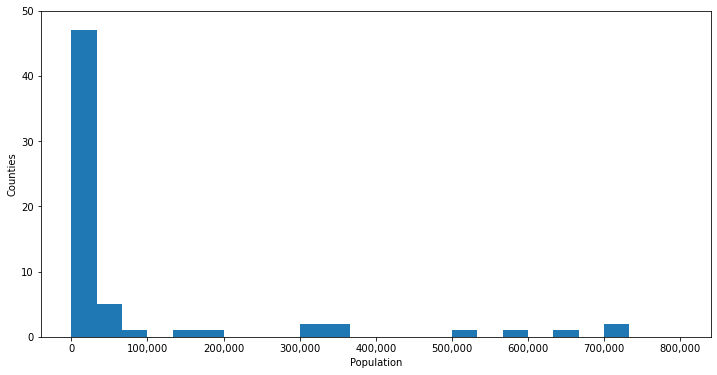

In [5]:
ax = co_counties['Population'].hist(bins=np.linspace(0,8e5,25),figsize=(12,6))
ax.set_ylim((0,50))
ax.grid(None)
ax.set_xlabel('Population')
ax.set_ylabel('Counties')

# https://stackoverflow.com/a/46574866/1574687
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

## Making and customizing scatterplots

### Using matplotlib, pandas, and seaborn interfaces

Text(0, 0.5, 'COVID-19 cases per capita')

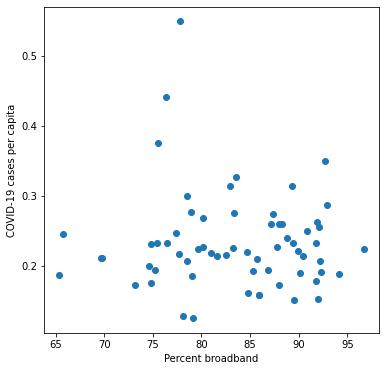

In [6]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the pandas Series to the x and y arguments
ax.scatter(
    x = co_counties['Pct_Broadband'],
    y = co_counties['covid_cases_percapita']
)

ax.set_xlabel('Percent broadband')
ax.set_ylabel('COVID-19 cases per capita')

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

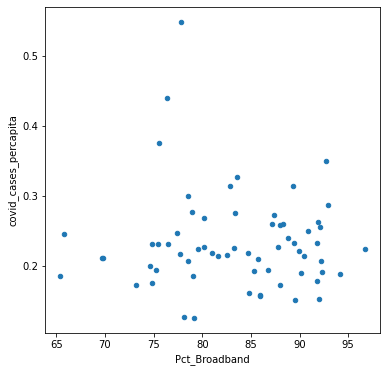

In [7]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments
co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    ax = ax
)

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

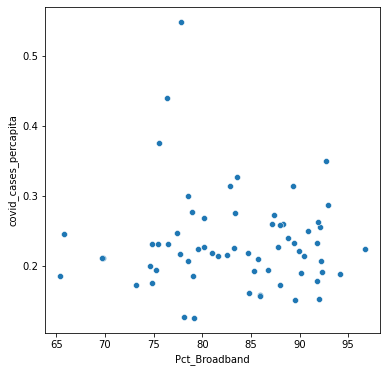

In [8]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments with the DataFrame
sb.scatterplot(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    data = co_counties,
    ax = ax
)

### Customizing scatter elements

Change the size of all the points to a new size.

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

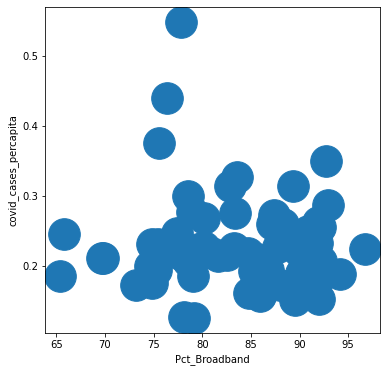

In [11]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments
co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 1000,
    ax = ax
)

Change the size of all the points based on a value.

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

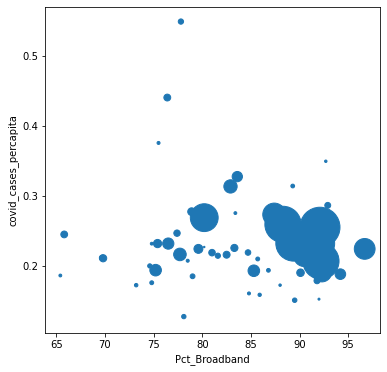

In [12]:
f,ax = plt.subplots(figsize=(6,6))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    ax = ax
)

Changing the transparency can help when there the points form a dense cloud.

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

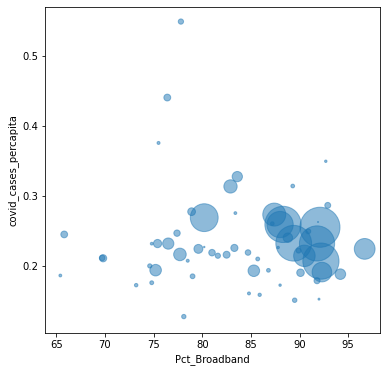

In [13]:
f,ax = plt.subplots(figsize=(6,6))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    alpha = .5,
    ax = ax
)

Change the colors of the points based on a value.

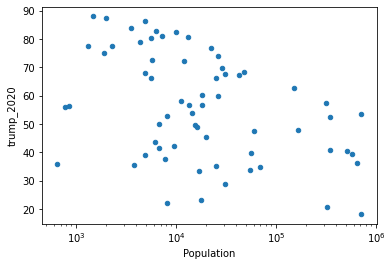

In [17]:
ax = co_counties.plot.scatter(
    x = 'Population',
    y = 'trump_2020',
)

ax.set_xscale('log')

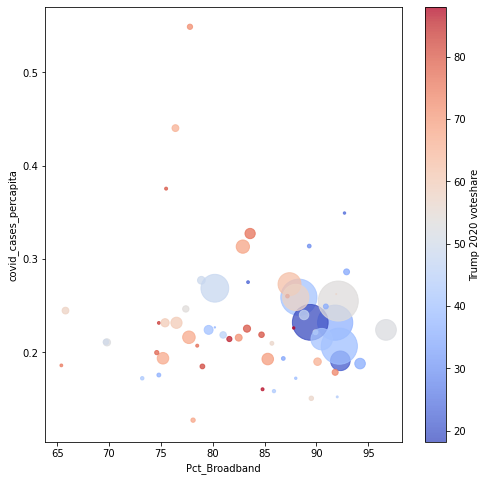

In [90]:
f,ax = plt.subplots(figsize=(8,8))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    c = co_counties['trump_2020'], # Have to pass as a Series, not a string
    alpha = .75,
    cmap = 'coolwarm',
    ax = ax
)

# We started with one axes, but added a colorbar axes as a second
cbar = f.get_axes()[-1]
cbar.set_ylabel('Trump 2020 voteshare')

plt.savefig('broadband_covid_trump.png',facecolor='w',bbox_inches='tight')

Annotate each value with the name of the county.

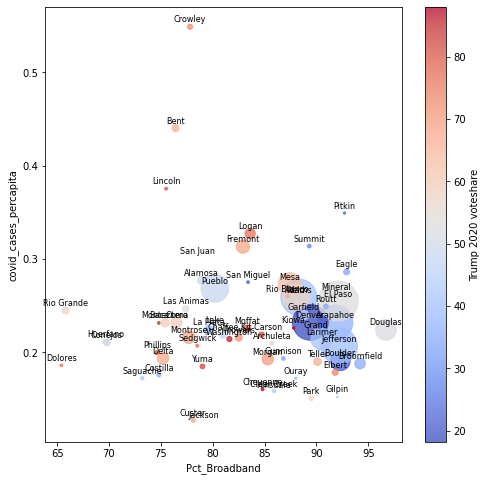

In [26]:
f,ax = plt.subplots(figsize=(8,8))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    c = co_counties['trump_2020'], # Have to pass as a Series, not a string
    alpha = .75,
    cmap = 'coolwarm',
    ax = ax
)

# We started with one axes, but added a colorbar axes as a second
cbar = f.get_axes()[-1]
cbar.set_ylabel('Trump 2020 voteshare')

# Convert the Series to a dictionary and loop through each point
for fips, name in co_counties['county'].to_dict().items():
    # Get the x and y values
    x = co_counties.loc[fips,'Pct_Broadband']
    y = co_counties.loc[fips,'covid_cases_percapita']

    # Make the annotation adding a bit of space and centering the labels
    ax.annotate(name,(x,y+.005),ha='center',fontsize=8)

Seaborn handles this a bit differently.

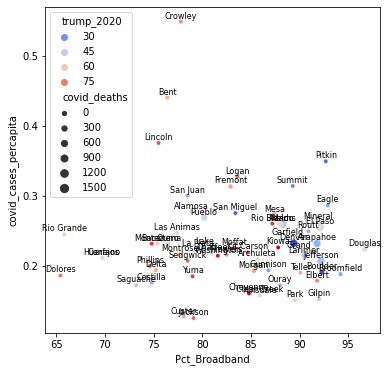

In [27]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments with the DataFrame
sb.scatterplot(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    hue = 'trump_2020',
    size = 'covid_deaths',
    palette = 'coolwarm',
    data = co_counties,
    ax = ax
)

# Convert the Series to a dictionary and loop through each point
for fips, name in co_counties['county'].to_dict().items():
    # Get the x and y values
    x = co_counties.loc[fips,'Pct_Broadband']
    y = co_counties.loc[fips,'covid_cases_percapita']
    
    # Make the annotation adding a bit of space and centering the labels
    ax.annotate(name,(x,y+.005),ha='center',fontsize=8)

#### Exercise

Make a scatterplot of the relationship between "Pct_Unemployed" and "Median_Income". Coloring the points by "Pct_White". Make a new column called "Scaled_Population" with the square root (or better variant) of the population. Make the sizes of the points the "Scaled_Population".

## Types of bivariate relationships


### A note on conventions

Of course correlation is not causation, but whenever we use scatterplots, we are making an implicit causal argument: one variable is influencing the other variable. The dominant convention for visualizing relationships is to have the causal variable on the x-axis and the outcome variable on the y-axis.

If we are arguing that broadband connectivity influences/causes COVID exposure behavior, we would put broadband connectivity on the x-axis and COVID cases on the y-axis.

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

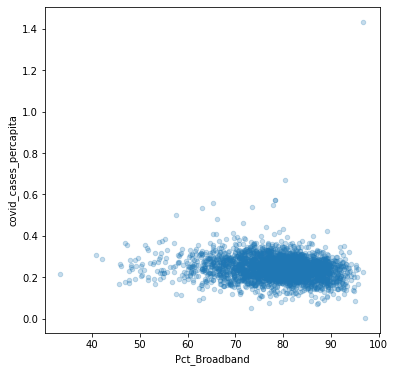

In [31]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    ax = ax,
    alpha = .25
)

If we are arguing the reverse causal relationship that COVID exposure influences/causes broadband connectivity, we would put COVID cases on the x-axis and broadband connectivity on the y-axis.

<AxesSubplot:xlabel='covid_cases_percapita', ylabel='Pct_Broadband'>

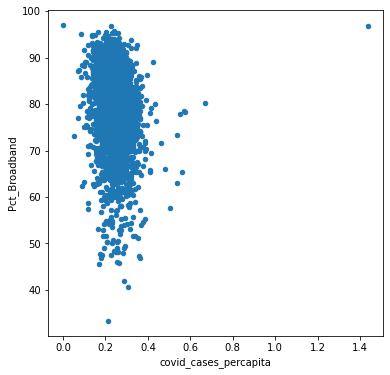

In [32]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'covid_cases_percapita',
    y = 'Pct_Broadband',
    ax = ax
)


### Positive relationship
What's the distribution of two variables?

<AxesSubplot:>

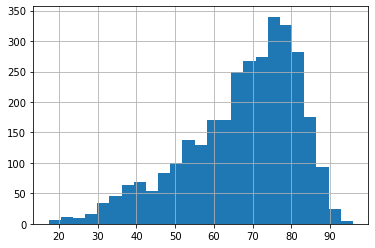

In [33]:
counties_df['Pct_Born_Same_State'].hist(bins=25)

<AxesSubplot:>

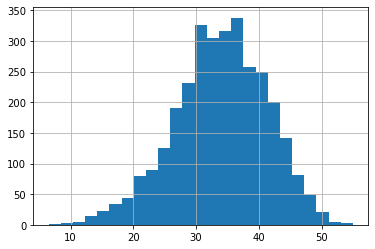

In [34]:
counties_df['Pct_HS_Grad'].hist(bins=25)

Let's make a scatterplot to see if there's some kind of relationship between these two variables.

Although this is a cloud of points, there's a positive correlation between these two variables: counties with low percentage of the population born in the same state also have low percentages of population with high school diplomas. Conversely, counties with high percentages of the population born in the same stage also have high percentages of the population with high school diplomas.

<AxesSubplot:xlabel='Pct_Born_Same_State', ylabel='Pct_HS_Grad'>

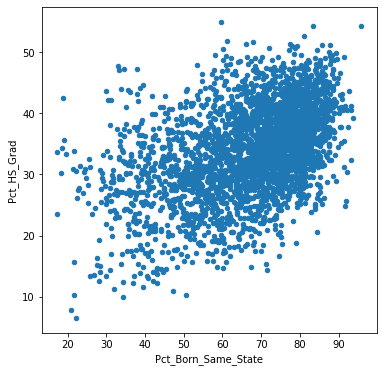

In [35]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Born_Same_State',
    y = 'Pct_HS_Grad',
    ax = ax
)

Let's plot the same relationship but swap the axes.

<AxesSubplot:xlabel='Pct_HS_Grad', ylabel='Pct_Born_Same_State'>

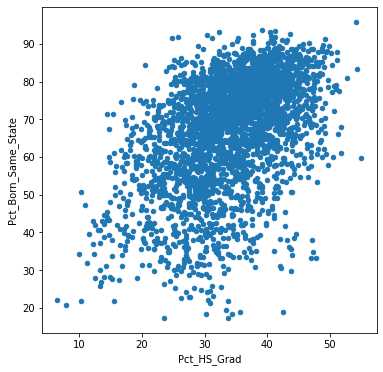

In [36]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_HS_Grad',
    y = 'Pct_Born_Same_State',
    ax = ax
)

We can quantify the strength of a linear relationship with the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). This can take values from -1 (a perfect negative linear relationship) to 1 (a perfect positive linear relationship) with 0 meaning there is no linear relationship.

The relationship between these two variables is 0.46 which is perhaps low in the natural sciences with simple mechanistic relationships but is moderate-to-high in the social sciences with complex and layered relationships.

In [37]:
counties_df.corr().loc['Pct_HS_Grad','Pct_Born_Same_State']

0.4605564519125698

#### Exercise

Plot the distributions for "Pct_Single_Female" and "Pct_Family_Poverty", make a scatterplot of the relationship, describe the relationship, and then report the correlation coefficient.

### Negative relationship

Let's explore the relationship between the percent of people who are on assistance with the percent of people who have broadband internet access. Before even looking at the data, I expect this relationship to be negative: counties with more people on public assistance tend to have people who cannot afford broadband internet access.

First explore the distributions of each variable.

<AxesSubplot:>

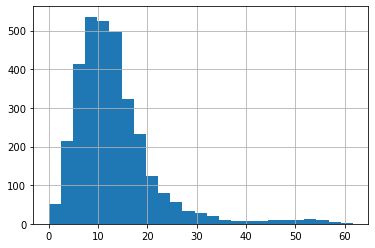

In [38]:
counties_df['Pct_Assistance'].hist(bins=25)

<AxesSubplot:>

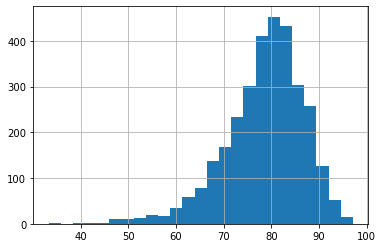

In [39]:
counties_df['Pct_Broadband'].hist(bins=25)

Make the scatterplot. As expected, counties with very few people on public assistance also have very high broadband usage while counties with more people on assistance have fewer people using broadband.

<AxesSubplot:xlabel='Pct_Assistance', ylabel='Pct_Broadband'>

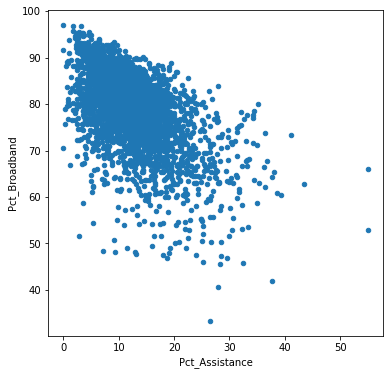

In [40]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Assistance',
    y = 'Pct_Broadband',
    ax = ax
)

Get the correlation coefficient. With social data, this is a very strong relationship!

In [41]:
counties_df.corr().loc['Pct_Assistance','Pct_Broadband']

-0.5431165371766581

#### Exercise

Plot the distributions for "Pct_English_Only" and "Pct_Hispanic", make a scatterplot of the relationship, describe the relationship, and then report the correlation coefficient.

### No relationship
Let's contrast with a relationship that has a very weak relationship. We could perhaps invent a mechanism that explains why counties with more women had more (or fewer) COVID cases per capita, but it's not obvious to me.

The distributions of these data also have some non-normal properties that makes any simple linear relationships suspect. In this case, most counties have Hispanic populations of less than 20% but there are dozens of counties with Hispanic populations in excess of 80%. The percent female variable is (unsurprisingly) strongly centered on 50% and drops sharply off more than 5% points in either direction.

<AxesSubplot:>

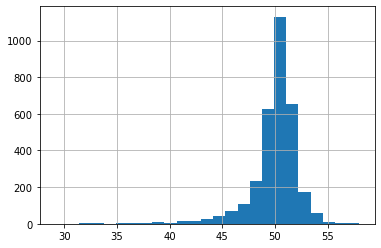

In [42]:
counties_df['Pct_Female'].hist(bins=25)

<AxesSubplot:>

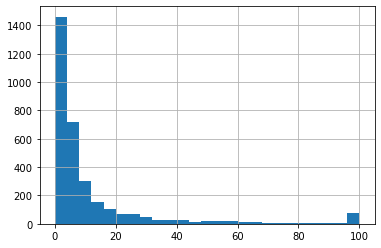

In [43]:
counties_df['Pct_Hispanic'].hist(bins=25)

When we plot the relationship between these variables, we see there is no obvious linear relationship. We can see the "shadows" of each respective variable's distribution relatively clearly: the group of highly Hispanic counties is at the top and there are very few counties with much more or less than 50% women.

<AxesSubplot:xlabel='Pct_Female', ylabel='Pct_Hispanic'>

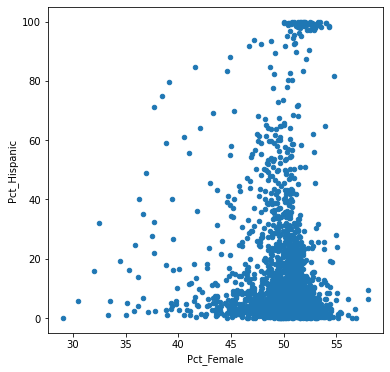

In [44]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Female',
    y = 'Pct_Hispanic',
    ax = ax
)

In [45]:
counties_df.corr().loc['Pct_Female','Pct_Hispanic']

-0.006874203438834395

### Non-linear relationships

Other kinds of relationships may be positive or negative, but not linear. Let's look at "Median_Income" and "Pct_Family_Poverty". Without even looking at the data, I expect this to be a negative relationship: more income means less poverty. But the distribution shows this isn't a simple linear relationship.

<AxesSubplot:>

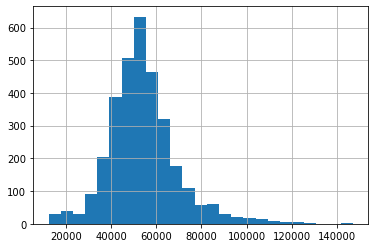

In [46]:
counties_df['Median_Income'].hist(bins=25)

<AxesSubplot:>

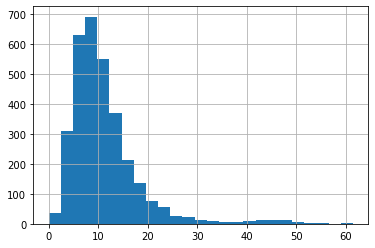

In [47]:
counties_df['Pct_Family_Poverty'].hist(bins=25)

So far so good, these are approximately normal distributions. But when we make the scatter plot, we can see the negative relationship but it is not linear.

<AxesSubplot:xlabel='Median_Income', ylabel='Pct_Family_Poverty'>

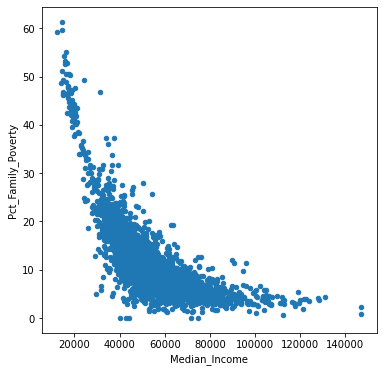

In [48]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Median_Income',
    y = 'Pct_Family_Poverty',
    ax = ax
)

In [50]:
counties_df.corr().loc['Median_Income','Pct_Family_Poverty']

-0.7031323844548861

Other times changing from one variable to similar variable can completely change — even reverse! — a relationship.

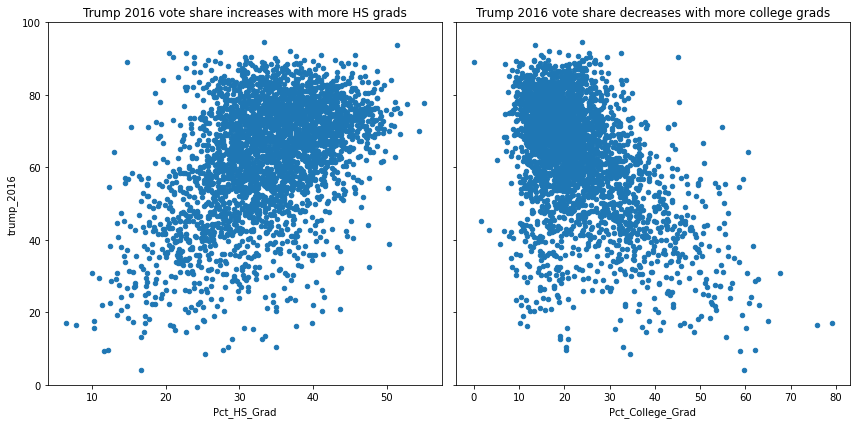

In [49]:
f,axs = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize = (12,6),
    sharey = True,
    subplot_kw = {'ylim':(0,100)}
)

counties_df.plot.scatter(
    x = 'Pct_HS_Grad',
    y = 'trump_2016',
    ax = axs[0]
)

counties_df.plot.scatter(
    x = 'Pct_College_Grad',
    y = 'trump_2016',
    ax = axs[1]
)

axs[0].set_title('Trump 2016 vote share increases with more HS grads')
axs[1].set_title('Trump 2016 vote share decreases with more college grads')

f.tight_layout()

In [51]:
counties_df.corr().loc['Pct_HS_Grad','trump_2016']

0.4537111487149217

In [52]:
counties_df.corr().loc['Pct_College_Grad','trump_2016']

-0.48834872488806047

## Modeling linear relationships

You may have encountered regression modeling in other courses. We don't have time to discuss it in depth in this class, but the intuition is we can estimate the parameters of a a linear equation representing the relationship between two variables.

$ y = \alpha + \beta x$

Where $y$ is the outcome (y-axis) variable, $x$ is the input (x-axis) variable, $\beta$ is the slope, and $\alpha$ is the y-intercept.

The $\beta$ and $\alpha$ values are estimated from the $x$ and $y$ data using a method called [ordinary least squares](https://en.wikipedia.org/wiki/Simple_linear_regression). We can use scipy's `linregress` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)) function to return these parameters by just passing the x and y data.

In [53]:
model = stats.linregress(
    x = counties_df['Pct_Born_Same_State'].fillna(0),
    y = counties_df['Pct_HS_Grad'].fillna(0),
)

model

LinregressResult(slope=0.37176150098846994, intercept=8.523122270767214, rvalue=0.7343720817551876, pvalue=0.0, stderr=0.0059858873804084735, intercept_stderr=0.4012758315775867)

These parameters have a substantive meaning. 
* The `slope` means that each additional percentage point of a county population born in the same state increases high school graduation rates by .37 percentage points. 
* The `intercept` means that the model predicts that if there were 0% born in the same state, the high school graduation rate would be 8.5%.
* The `rvalue` is the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), a measure of model performance, capturing the percentage of variation explained by the variables in the model. 73% of the variation in "Pct_Born_Same_State" can be explained by "Pct_HS_Grad".
* The `pvalue` is the hypothesis test whose null hypothesis is the slope is 0.
* The `stderr` and `intercept_stderr` are errors in the estimates for the slope and intercept.

Don't put too much stock in the rvalue and pvalue, these can be misleading especially for some kinds of relationships which is why it's always important to plot the distributions of data.

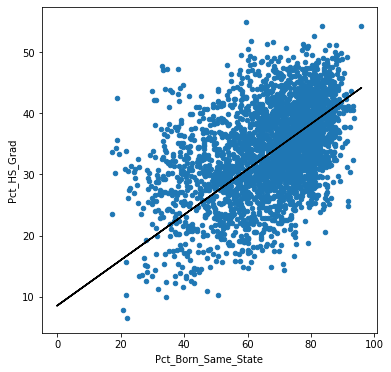

In [54]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Born_Same_State',
    y = 'Pct_HS_Grad',
    ax = ax
)

_x = counties_df['Pct_Born_Same_State'].fillna(0)
ax.plot(_x,model.intercept + model.slope*_x,color='k')

Seaborn's `lmplot` ([docs](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) will also make a scatterplot with a linear model estimate (and some other goodies).

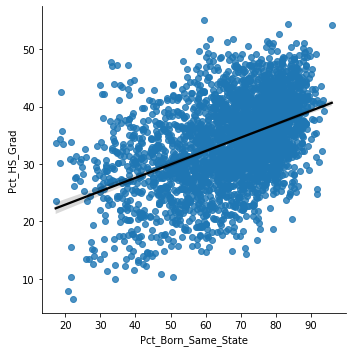

In [55]:
g = sb.lmplot(
    data = counties_df,
    x = 'Pct_Born_Same_State',
    y = 'Pct_HS_Grad',
    line_kws = {'color':'k'}
)

### Positive relationship

In [56]:
stats.linregress(
    x = counties_df['Pct_Born_Same_State'].fillna(0),
    y = counties_df['Pct_HS_Grad'].fillna(0),
)

LinregressResult(slope=0.37176150098846994, intercept=8.523122270767214, rvalue=0.7343720817551876, pvalue=0.0, stderr=0.0059858873804084735, intercept_stderr=0.4012758315775867)

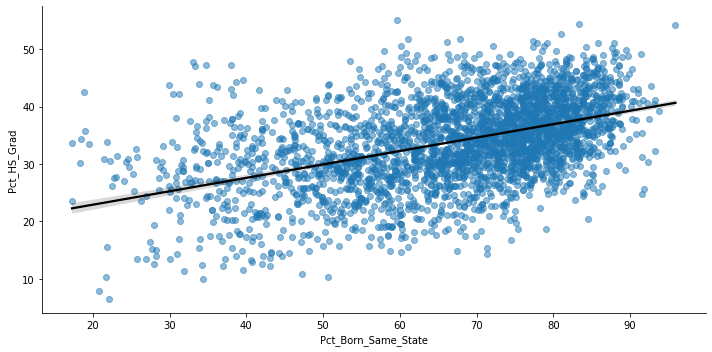

In [57]:
g = sb.lmplot(
    data = counties_df,
    x = 'Pct_Born_Same_State',
    y = 'Pct_HS_Grad',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'k'}
)

### Negative relationship

In [58]:
stats.linregress(
    x = counties_df['Pct_Assistance'].fillna(0),
    y = counties_df['Pct_Broadband'].fillna(0),
)

LinregressResult(slope=-0.9066381399703985, intercept=86.41558081330632, rvalue=-0.4073139091782904, pvalue=5.436025192504391e-132, stderr=0.03541480804023236, intercept_stderr=0.544575895985653)

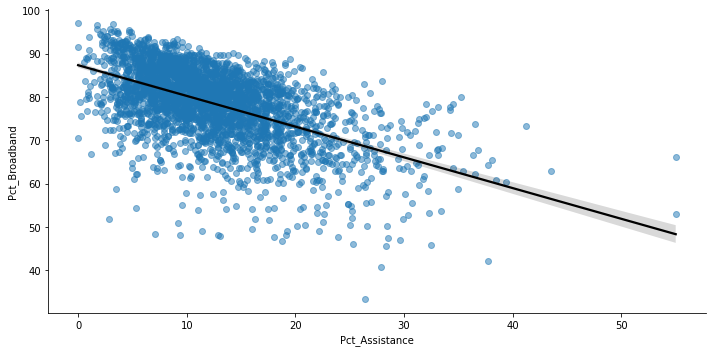

In [91]:
g = sb.lmplot(
    data = counties_df,
    x = 'Pct_Assistance',
    y = 'Pct_Broadband',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'k'}
)

plt.savefig('assistance_broadband.png',facecolor='w',bbox_inches='tight')

### No relationship

In [60]:
stats.linregress(
    x = counties_df['Pct_Female'].fillna(0),
    y = counties_df['Pct_Hispanic'].fillna(0),
)

LinregressResult(slope=0.20946561788573606, intercept=1.255136340943718, rvalue=0.0886755084683375, pvalue=3.3997279521890573e-07, stderr=0.04098897873086354, intercept_stderr=2.0245524639499894)

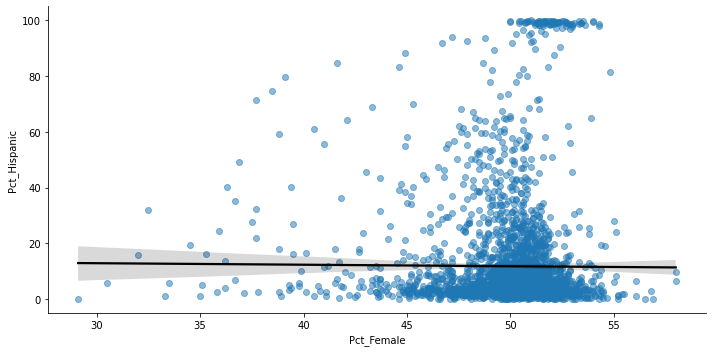

In [61]:
g = sb.lmplot(
    data = counties_df,
    x = 'Pct_Female',
    y = 'Pct_Hispanic',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'k'}
)

### Non-linear relationship

In [62]:
stats.linregress(
    x = counties_df['Median_Income'].fillna(0),
    y = counties_df['Pct_Family_Poverty'].fillna(0),
)

LinregressResult(slope=-0.00020995044053640567, intercept=22.048411822339162, rvalue=-0.4864429635601181, pvalue=1.8391686712121365e-195, stderr=6.5693987253476576e-06, intercept_stderr=0.36526449358139207)

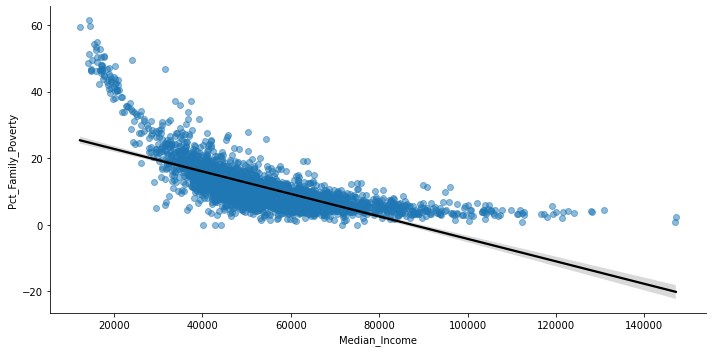

In [92]:
g = sb.lmplot(
    data = counties_df,
    x = 'Median_Income',
    y = 'Pct_Family_Poverty',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'k'}
)

plt.savefig('poverty_income.png',facecolor='w',bbox_inches='tight')

## Pair plots, correlograms, and clustermaps

With all the data we have in the US counties data, it can be helpful to see all the visualizations of the correlations at once. For each pair of variables, we will make a scatterplot.

Seaborn's `pairplot` function ([docs](https://seaborn.pydata.org/generated/seaborn.pairplot.html), [examples](https://python-graph-gallery.com/correlogram/)) makes it easy to generate these figures, but it can take a while when there are many columns and/or large datasets.

In [64]:
# Select just a few columns for simplicity
select_columns = ['trump_2020','covid_cases_percapita','Pct_Over_65','Pct_White','Pct_Unemployed','Median_Income','Pct_English_Only']

Make the pairplot.

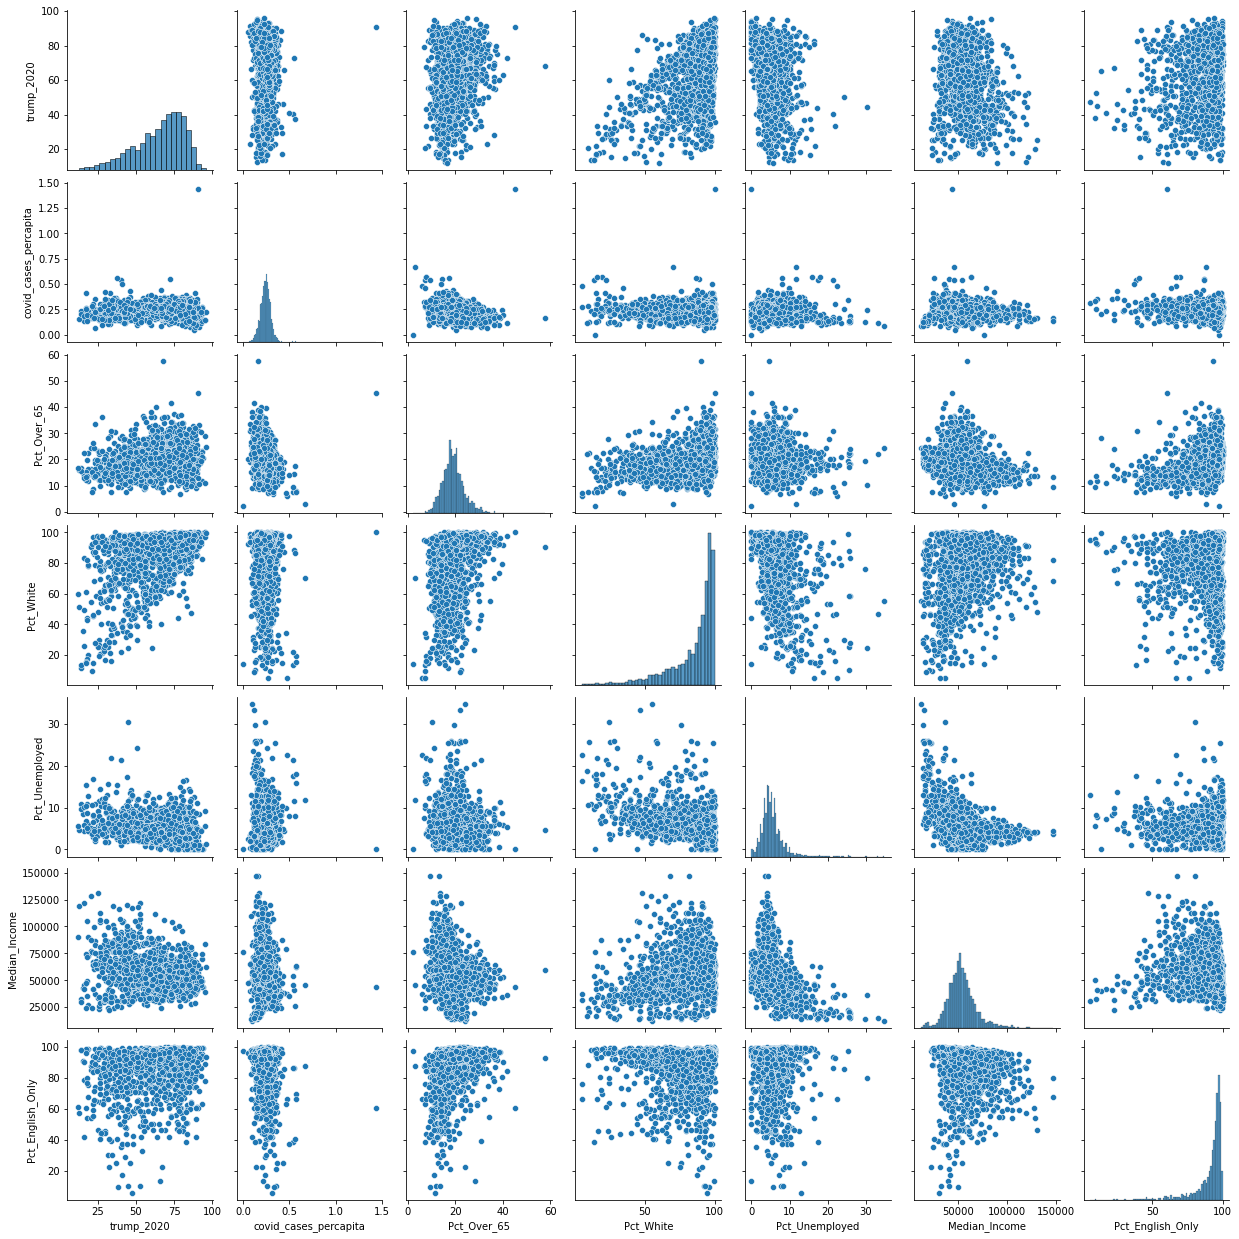

In [65]:
sb.pairplot(
    data = counties_df[select_columns]
)

Customize the plot to:
1. Only visualize below the diagonal (`corner = True`)
2. Estimate a regression line (`kind='reg'`)
3. Customize the regression line color and transparency of the scatter points.

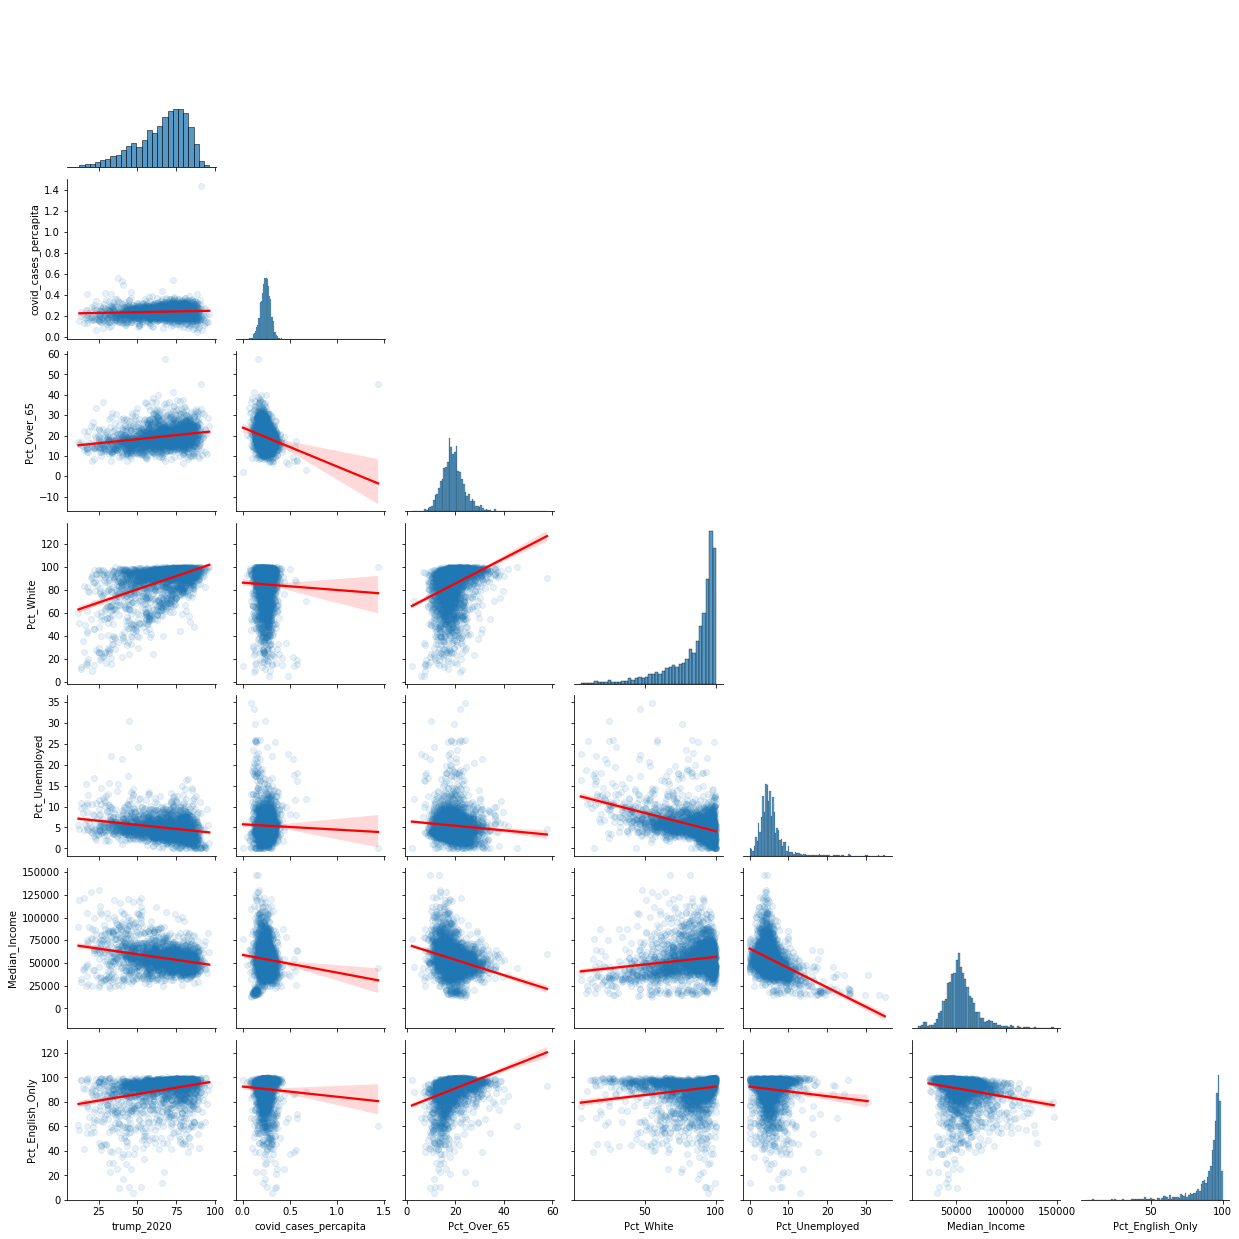

In [66]:
sb.pairplot(
    data = counties_df[select_columns],
    kind = 'reg',
    corner = True,
    plot_kws = {
        'scatter_kws':{
            'alpha':.1
        },
        'line_kws':{
            'color':'red'
        }
    }
)

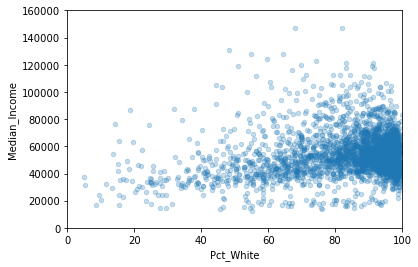

In [89]:
counties_df.plot.scatter(x='Pct_White',y='Median_Income',alpha=.25,xlim=(0,100),ylim=(0,160000))
plt.savefig('white_income.png',bbox_inches='tight',facecolor='w')

In [87]:
counties_corr.loc['Pct_White','Median_Income']

0.18478628235500846

Alternatively, we could compute the correlation and use Seaborn's `heatmap` ([docs](https://seaborn.pydata.org/generated/seaborn.heatmap.html)) to visualize these values.

In [67]:
counties_corr = counties_df.corr()
counties_corr.head()

,trump_2016,trump_2020,16_20_shift,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
trump_2016,1.000000,0.984394,0.044151,-0.302023,-0.280214,-0.428625,0.453711,-0.488349,0.184005,0.301027,0.197805,0.192612,-0.083157,0.132877,0.318292,-0.171658,-0.073669,-0.225018,-0.244530,-0.156468,-0.130175,-0.067596,-0.350005,0.090338,0.261506,-0.147601,0.535124,-0.183702,0.288920,0.109824,0.316315
trump_2020,0.984394,1.000000,0.219270,-0.325911,-0.309799,-0.417879,0.473399,-0.553983,0.243410,0.285981,0.165778,0.201708,-0.091846,0.184376,0.271707,-0.222320,-0.055181,-0.248578,-0.288587,-0.174237,-0.177570,-0.077824,-0.375342,0.122588,0.263857,-0.178757,0.500744,-0.142100,0.256281,0.078529,0.349028
16_20_shift,0.044151,0.219270,1.000000,-0.071695,-0.075904,-0.140569,0.180611,-0.360587,-0.114868,0.107796,0.079345,0.112394,-0.078848,0.226846,-0.272540,-0.258714,-0.089752,-0.033610,-0.231418,0.148389,-0.168795,0.155107,-0.083783,0.259162,-0.018077,-0.179248,0.149968,0.318139,-0.114745,0.088344,0.121312
covid_cases,-0.302023,-0.325911,-0.071695,1.000000,0.960762,0.095800,-0.274360,0.283238,-0.144518,-0.206985,-0.093210,-0.170857,0.015667,-0.014054,-0.299568,0.231654,0.024181,0.005605,0.233648,-0.057552,0.028760,-0.069449,0.980842,0.047410,-0.199258,0.090491,-0.148281,0.111178,-0.318677,0.032704,-0.120973
covid_deaths,-0.280214,-0.309799,-0.075904,0.960762,1.000000,0.124247,-0.229954,0.236258,-0.131865,-0.172459,-0.072853,-0.148302,0.008455,-0.006642,-0.287941,0.201328,0.013152,0.049905,0.189968,-0.013605,0.015041,-0.034694,0.960859,0.036844,-0.169303,0.107896,-0.161880,0.188675,-0.294005,0.017407,-0.058546


<AxesSubplot:>

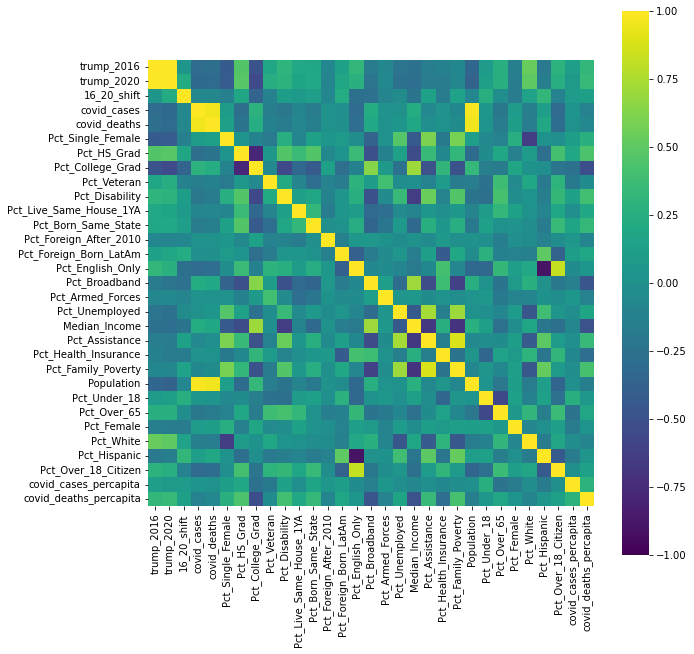

In [68]:
f,ax = plt.subplots(figsize=(10,10))

sb.heatmap(
    data = counties_corr,
    square = True,
    cmap = 'viridis',
    vmin = -1,
    vmax = 1
)

We can use Seaborn's `clustermap` ([docs](https://seaborn.pydata.org/generated/seaborn.clustermap.html)) to re-arrange the rows and columns so that variables with similar correlations are grouped together.

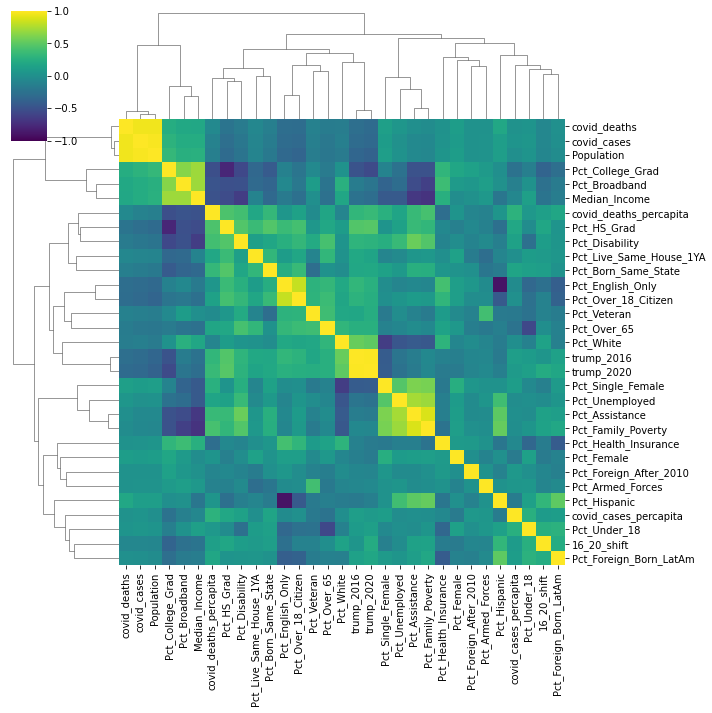

In [69]:
sb.clustermap(
    data = counties_corr,
    cmap = 'viridis',
    vmin = -1,
    vmax = 1
)

## Appendix

### Presidential results

This is data from the MIT Eelection Data and Science Lab: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

In [ ]:
county_pres_df = pd.read_csv('countypres_2000-2020.csv',dtype={'county_fips':str})
county_pres_df.head()

In [ ]:
c0 = county_pres_df['party'] == 'REPUBLICAN'
c1 = county_pres_df['year'].isin([2016,2020])
c2 = county_pres_df['mode'] == 'TOTAL'
gop_16_20_df = county_pres_df.copy()[c0 & c1 & c2]
gop_16_20_df['Pct'] = (100 * gop_16_20_df['candidatevotes'] / gop_16_20_df['totalvotes']).round(1)
gop_16_20_df['full_county'] = gop_16_20_df['county_name'].str.title() + ' County, ' + gop_16_20_df['state'].str.title()

gop_16_20_df#.pivot(index='county_fips',columns='year',values='Pct')

In [ ]:
fips_state_map = gop_16_20_df[['county_fips','state']].drop_duplicates().sort_values('county_fips').dropna(subset=['county_fips']).set_index('county_fips')
fips_county_map = gop_16_20_df[['county_fips','county_name']].drop_duplicates().sort_values('county_fips').dropna(subset=['county_fips']).set_index('county_fips')

In [ ]:
gop_16_20_pivot = pd.pivot_table(
    data = gop_16_20_df,
#     index = 'full_county',
    index = 'county_fips',
    columns = 'year',
    values = 'Pct',
    aggfunc = 'mean'
)

gop_16_20_pivot.rename(columns = {2016:'trump_2016',2020:'trump_2020'},inplace=True)
gop_16_20_pivot['16_20_shift'] = gop_16_20_pivot['trump_2020'] - gop_16_20_pivot['trump_2016']

gop_16_20_pivot['state'] = fips_state_map
gop_16_20_pivot['state'] = gop_16_20_pivot['state'].str.title()

gop_16_20_pivot['county'] = fips_county_map
gop_16_20_pivot['county'] = gop_16_20_pivot['county'].str.title()


gop_16_20_pivot.head()

### Census

Census tables DP02, DP03, and DP05 from the 5-year American Community Survey: https://data.census.gov/cedsci/table?d=ACS%205-Year%20Estimates%20Data%20Profiles

In [79]:
dp02_df = pd.read_csv('ACSDP5Y2020.DP02_data_with_overlays_2022-03-21T132159.csv',header=[1],index_col=-2)

dp02_estimate_cols = [col for col in dp02_df.columns if 'Estimate!!' in col]
dp02_percent_cols = [col for col in dp02_df.columns if 'Percent!!' in col]

dp02_estimates_df = dp02_df[dp02_estimate_cols]
dp02_estimates_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp02_estimates_df.columns])

dp02_percent_df = dp02_df[dp02_percent_cols]
dp02_percent_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp02_percent_df.columns])

dp02_percent_df.head()

/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/3899355418.py:1: DtypeWarning: Columns (69,97,121,150,151,152,153,160,161,168,169,178,179,182,183,186,187,190,191,194,195,214,215,218,219,222,223,226,227,230,231,233,398,399,402,403) have mixed types. Specify dtype option on import or set low_memory=False.
  dp02_df = pd.read_csv('ACSDP5Y2020.DP02_data_with_overlays_2022-03-21T132159.csv',header=[1],index_col=-2)
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/3899355418.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp02_percent_df.sort_index(axis=0,inplace=True)
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/3899355418.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Percent                                  \
                       ANCESTRY                                   
               Total population                                   
                       American Arab Czech Danish Dutch English   
                            NaN  NaN   NaN    NaN   NaN     NaN   
                            NaN  NaN   NaN    NaN   NaN     NaN   
                            NaN  NaN   NaN    NaN   NaN     NaN   
id                                                                
0100000US                   5.9  0.6   0.4    0.4   1.1     7.7   
0500000US01001             13.9  0.0   0.2    0.1   0.4     8.9   
0500000US01003             23.2  0.3   0.6    0.1   0.6    10.5   
0500000US01005             16.0  0.3   0.1    0.0   0.1     4.3   
0500000US01007             22.5  0.0   0.0    0.0   0.2     4.4   

                                                                              \
                                                                               
                                                                               
               French (except Basque) French Canadian German Greek Hungarian   
                                  NaN             NaN    NaN   NaN       NaN   
                                  NaN             NaN    NaN   NaN       NaN   
                                  NaN             NaN    NaN   NaN       NaN   
id                                                                             
0100000US                         2.3             0.6   13.0   0.4       0.4   
0500000US01001                    1.5             0.2    9.5   0.2       0.2   
0500000US01003                    3.0             0.3    9.9   0.3       0.4   
0500000US01005                    0.4             0.4    3.4   0.1       0.0   
0500000US01007                    0.6             0.0    5.7   0.0       0.0   

                                                                             \
                                                                              
                                                                              
               Irish Italian Lithuanian Norwegian Polish Portuguese Russian   
                 NaN     NaN        NaN       NaN    NaN        NaN     NaN   
                 NaN     NaN        NaN       NaN    NaN        NaN     NaN   
                 NaN     NaN        NaN       NaN    NaN        NaN     NaN   
id                                                                            
0100000US        9.7     5.1        0.2       1.3    2.7        0.4     0.8   
0500000US01001   9.0     1.5        0.1       0.5    0.4        0.0     0.0   
0500000US01003   9.9     2.4        0.1       0.5    0.9        0.0     0.1   
0500000US01005   5.4     1.5        0.0       0.0    0.1        0.0     0.0   
0500000US01007   6.8     0.9        0.0       0.1    0.3        0.0     0.0   

                                                                              \
                                                                               
                                                                               
               Scotch-Irish Scottish Slovak Subsaharan African Swedish Swiss   
                        NaN      NaN    NaN                NaN     NaN   NaN   
                        NaN      NaN    NaN                NaN     NaN   NaN   
                        NaN      NaN    NaN                NaN     NaN   NaN   
id                                                                             
0100000US               0.9      1.6    0.2                1.2     1.1   0.3   
0500000US01001          1.1      2.5    0.0                0.8     0.5   0.1   
0500000US01003          2.1      2.2    0.1                0.2     0.8   0.1   
0500000US01005          0.9      0.7    0.0                0.7     0.1   0.0   
0500000US01007          0.8      1.0    0.0                0.4     0.0   0.0   

                                          

In [80]:
dp02_select_cols = pd.DataFrame()

dp02_select_cols['Pct_Single_Female'] = dp02_percent_df.loc[:,('Percent','HOUSEHOLDS BY TYPE','Total households','Female householder, no spouse/partner present',np.nan,np.nan,np.nan)]
dp02_select_cols['Pct_HS_Grad'] = dp02_percent_df.loc[:,('Percent','EDUCATIONAL ATTAINMENT','Population 25 years and over','High school graduate (includes equivalency)')]
dp02_select_cols['Pct_College_Grad'] = dp02_percent_df.loc[:,('Percent','EDUCATIONAL ATTAINMENT','Population 25 years and over','Bachelor\'s degree or higher')]
dp02_select_cols['Pct_Veteran'] = dp02_percent_df.loc[:,('Percent','VETERAN STATUS','Civilian population 18 years and over','Civilian veterans')]
dp02_select_cols['Pct_Disability'] = dp02_percent_df.loc[:,('Percent','DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION','Total Civilian Noninstitutionalized Population','With a disability')]
dp02_select_cols['Pct_Live_Same_House_1YA'] = dp02_percent_df.loc[:,('Percent','RESIDENCE 1 YEAR AGO','Population 1 year and over','Same house')]
dp02_select_cols['Pct_Born_Same_State'] = dp02_percent_df.loc[:,('Percent','PLACE OF BIRTH','Total population','Native','Born in United States','State of residence')]
dp02_select_cols['Pct_Foreign_After_2010'] = dp02_percent_df.loc[:,('Percent','YEAR OF ENTRY','Population born outside the United States','Foreign born','Entered 2010 or later')]
dp02_select_cols['Pct_Foreign_Born_LatAm'] = dp02_percent_df.loc[:,('Percent','WORLD REGION OF BIRTH OF FOREIGN BORN','Foreign-born population, excluding population born at sea','Latin America')]
dp02_select_cols['Pct_English_Only'] = dp02_percent_df.loc[:,('Percent','LANGUAGE SPOKEN AT HOME','Population 5 years and over','English only')]
dp02_select_cols['Pct_Broadband'] = dp02_percent_df.loc[:,('Percent','COMPUTERS AND INTERNET USE','Total households','With a broadband Internet subscription')]
dp02_select_cols.head()

/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/2035929303.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp02_select_cols['Pct_HS_Grad'] = dp02_percent_df.loc[:,('Percent','EDUCATIONAL ATTAINMENT','Population 25 years and over','High school graduate (includes equivalency)')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/2035929303.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp02_select_cols['Pct_College_Grad'] = dp02_percent_df.loc[:,('Percent','EDUCATIONAL ATTAINMENT','Population 25 years and over','Bachelor\'s degree or higher')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/2035929303.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp02_select_cols['Pct_Veteran'] = dp02_percent_df.loc[:,('Percent','VETERAN STATUS','Civilian population 18 years and over','Civilian veterans')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipyke

,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband
id,,,,,,,,,,,
0100000US,27.6,26.7,32.9,7.1,12.7,86.2,58.2,22.8,50.0,78.5,85.2
0500000US01001,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7
0500000US01003,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1
0500000US01005,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6
0500000US01007,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1


In [72]:
dp03_df = pd.read_csv('ACSDP5Y2020.DP03_data_with_overlays_2022-03-21T131620.csv',header=[1],index_col=-2)

dp03_estimate_cols = [col for col in dp03_df.columns if 'Estimate!!' in col]
dp03_percent_cols = [col for col in dp03_df.columns if 'Percent!!' in col]

dp03_estimates_df = dp03_df[dp03_estimate_cols]
dp03_estimates_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp03_estimates_df.columns])

dp03_percent_df = dp03_df[dp03_percent_cols]
dp03_percent_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp03_percent_df.columns])

dp03_percent_df.head()

/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/1347638136.py:1: DtypeWarning: Columns (58,59,66,67,96,97,244,245,264,265,272,273,340,341,356,357,360,361,364,365,368,369,372,373,438,439,442,443,446,447,450,451,478,479,482,483,490,491,498,499,502,503,514,515,518,519,522,523,526,527) have mixed types. Specify dtype option on import or set low_memory=False.
  dp03_df = pd.read_csv('ACSDP5Y2020.DP03_data_with_overlays_2022-03-21T131620.csv',header=[1],index_col=-2)


Percent                 \
                          EMPLOYMENT STATUS                  
               Population 16 years and over                  
                                        NaN In labor force   
                                        NaN            NaN   
                                        NaN            NaN   
                                        NaN            NaN   
id                                                           
0500000US01001                        44360           58.7   
0500000US01003                       176852           58.3   
0500000US01005                        20407           45.8   
0500000US01007                        18421           48.7   
0500000US01009                        46083           52.4   

                                                                      \
                                                                       
                                                                       
                                                                       
               Civilian labor force                     Armed Forces   
                                NaN Employed Unemployed          NaN   
                                NaN      NaN        NaN          NaN   
id                                                                     
0500000US01001                 57.1     55.4        1.7          1.6   
0500000US01003                 58.1     55.8        2.3          0.2   
0500000US01005                 45.8     42.7        3.2          0.0   
0500000US01007                 48.7     45.1        3.6          0.0   
0500000US01009                 52.3     49.6        2.7          0.1   

                                                                          \
                                                                           
                                  Civilian labor force                     
               Not in labor force                  NaN Unemployment Rate   
                              NaN                  NaN               NaN   
                              NaN                  NaN               NaN   
                              NaN                  NaN               NaN   
id                                                                         
0500000US01001               41.3                25316               2.9   
0500000US01003               41.7               102795               3.9   
0500000US01005               54.2                 9356               6.9   
0500000US01007               51.3                 8970               7.4   
0500000US01009               47.6                24089               5.2   

                                                                              \
                                                                               
               Females 16 years and over                                       
                                     NaN In labor force                        
                                     NaN            NaN Civilian labor force   
                                     NaN            NaN                  NaN   
                                     NaN            NaN                  NaN   
id                                                                             
0500000US01001                     23150           51.1                 50.6   
0500000US01003                     92153           53.8                 53.8   
0500000US01005                      9591           48.6                 48.6   
0500000US01007                      8551           46.8                 46.8   
0500000US01009                     23304           46.4                 46.3   

                                                                       \
                                                                        
                        Own children of the householder under 6 years   
                                           

In [73]:
dp03_select_cols = pd.DataFrame()

dp03_select_cols['Pct_Armed_Forces'] = dp03_percent_df.loc[:,('Percent','EMPLOYMENT STATUS','Population 16 years and over','In labor force','Armed Forces')]
dp03_select_cols['Pct_Unemployed'] = dp03_percent_df.loc[:,('Percent','EMPLOYMENT STATUS','Civilian labor force','Unemployment Rate')]
dp03_select_cols['Median_Income'] = dp03_estimates_df.loc[:,('Estimate','INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)','Total households','Median household income (dollars)')]
dp03_select_cols['Pct_Assistance'] = dp03_percent_df.loc[:,('Percent','INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)','Total households','With Food Stamp/SNAP benefits in the past 12 months')]
dp03_select_cols['Pct_Health_Insurance'] = dp03_percent_df.loc[:,('Percent','HEALTH INSURANCE COVERAGE','Civilian noninstitutionalized population','With health insurance coverage',np.nan,np.nan,np.nan)]
dp03_select_cols['Pct_Family_Poverty'] = dp03_percent_df.loc[:,('Percent','PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL','All families',np.nan)]

dp03_select_cols.head()

/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/1434743795.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp03_select_cols['Pct_Armed_Forces'] = dp03_percent_df.loc[:,('Percent','EMPLOYMENT STATUS','Population 16 years and over','In labor force','Armed Forces')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/1434743795.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp03_select_cols['Pct_Unemployed'] = dp03_percent_df.loc[:,('Percent','EMPLOYMENT STATUS','Civilian labor force','Unemployment Rate')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/1434743795.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp03_select_cols['Median_Income'] = dp03_estimates_df.loc[:,('Estimate','INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)','Total households','Median household income (dollars)')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipy

,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty
id,,,,,,
0500000US01001,1.6,2.9,57982,10.6,92.0,12.7
0500000US01003,0.2,3.9,61756,6.9,90.5,6.3
0500000US01005,0.0,6.9,34990,24.3,89.3,23.8
0500000US01007,0.0,7.4,51721,18.5,90.9,17.0
0500000US01009,0.1,5.2,48922,10.5,90.0,10.1


In [74]:
dp05_df = pd.read_csv('ACSDP5Y2020.DP05_data_with_overlays_2022-03-21T130748.csv',header=[1],index_col=-2)

dp05_estimate_cols = [col for col in dp05_df.columns if 'Estimate!!' in col]
dp05_percent_cols = [col for col in dp05_df.columns if 'Percent!!' in col]

dp05_estimates_df = dp05_df[dp05_estimate_cols]
dp05_estimates_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp05_estimates_df.columns])

dp05_percent_df = dp05_df[dp05_percent_cols]
dp05_percent_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp05_percent_df.columns])

dp05_percent_df.head()

Percent               \
                    SEX AND AGE                
               Total population                
                            NaN  Male Female   
                            NaN   NaN    NaN   
                            NaN   NaN    NaN   
id                                             
0500000US01001            55639  48.6   51.4   
0500000US01003           218289  48.5   51.5   
0500000US01005            25026  52.6   47.4   
0500000US01007            22374  53.7   46.3   
0500000US01009            57755  49.7   50.3   

                                                                             \
                                                                              
                                                                              
               Sex ratio (males per 100 females) Under 5 years 5 to 9 years   
                                             NaN           NaN          NaN   
                                             NaN           NaN          NaN   
id                                                                            
0500000US01001                               (X)           5.8          6.7   
0500000US01003                               (X)           5.5          5.3   
0500000US01005                               (X)           5.3          6.2   
0500000US01007                               (X)           5.6          5.3   
0500000US01009                               (X)           6.1          6.0   

                                                                            \
                                                                             
                                                                             
               10 to 14 years 15 to 19 years 20 to 24 years 25 to 34 years   
                          NaN            NaN            NaN            NaN   
                          NaN            NaN            NaN            NaN   
id                                                                           
0500000US01001            6.6            6.7            6.2           12.7   
0500000US01003            6.9            6.0            5.1           11.2   
0500000US01005            5.7            5.5            6.1           14.6   
0500000US01007            5.4            6.5            5.8           14.5   
0500000US01009            7.1            6.4            5.5           11.9   

                                                                            \
                                                                             
                                                                             
               35 to 44 years 45 to 54 years 55 to 59 years 60 to 64 years   
                          NaN            NaN            NaN            NaN   
                          NaN            NaN            NaN            NaN   
id                                                                           
0500000US01001           13.1           14.0            7.4            5.5   
0500000US01003           12.1           13.1            7.0            7.4   
0500000US01005           12.2           12.5            6.4            6.4   
0500000US01007           13.8           14.0            6.7            6.0   
0500000US01009           12.2           13.2            6.8            6.8   

                                                                \
                                                                 
                                                                 
               65 to 74 years 75 to 84 years 85 years and over   
                          NaN            NaN               NaN   
                          NaN            NaN               NaN   
id                                                               
0500000US01001            8.9            4.6               1.7   
0500000US01003           12.3            6.3               1.9   
0500000US01005           11.4 

In [75]:
dp05_select_cols = pd.DataFrame()
dp05_select_cols['Population'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population',np.nan,np.nan,np.nan)]
dp05_select_cols['Pct_Under_18'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','Under 18 years')]
dp05_select_cols['Pct_Over_65'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','65 years and over',np.NaN,np.NaN)]
dp05_select_cols['Pct_Female'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','Female')]
dp05_select_cols['Pct_White'] = dp05_percent_df.loc[:,('Percent','Race alone or in combination with one or more other races','Total population','White')]
dp05_select_cols['Pct_Hispanic'] = dp05_percent_df.loc[:,('Percent','HISPANIC OR LATINO AND RACE','Total population','Hispanic or Latino (of any race)',np.NaN,np.NaN)]
dp05_select_cols['Pct_Over_18_Citizen'] = (100 * dp05_percent_df.loc[:,('Percent','CITIZEN, VOTING AGE POPULATION','Citizen, 18 and over population',np.NaN,np.NaN,np.NaN)] / dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','18 years and over.1',np.NaN,np.NaN)]).round(1)

dp05_select_cols.head()


/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/1891644909.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp05_select_cols['Pct_Under_18'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','Under 18 years')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/1891644909.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp05_select_cols['Pct_Female'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','Female')]
/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_89809/1891644909.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dp05_select_cols['Pct_White'] = dp05_percent_df.loc[:,('Percent','Race alone or in combination with one or more other races','Total population','White')]


,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen
id,,,,,,,
0500000US01001,55639,23.6,15.3,51.4,78.0,2.9,98.7
0500000US01003,218289,21.5,20.5,51.5,87.9,4.6,98.1
0500000US01005,25026,20.9,19.1,47.4,47.9,4.4,98.3
0500000US01007,22374,20.5,16.4,46.3,77.1,2.7,98.8
0500000US01009,57755,23.2,18.0,50.3,96.2,9.3,96.8


In [76]:
census_df = pd.concat([dp02_select_cols,dp03_select_cols,dp05_select_cols],axis=1)
census_df.index = census_df.index.str.slice(-5)
census_df.head()

,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen
id,,,,,,,,,,,,,,,,,,,,,,,,
01001,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982,10.6,92.0,12.7,55639,23.6,15.3,51.4,78.0,2.9,98.7
01003,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756,6.9,90.5,6.3,218289,21.5,20.5,51.5,87.9,4.6,98.1
01005,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990,24.3,89.3,23.8,25026,20.9,19.1,47.4,47.9,4.4,98.3
01007,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721,18.5,90.9,17.0,22374,20.5,16.4,46.3,77.1,2.7,98.8
01009,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922,10.5,90.0,10.1,57755,23.2,18.0,50.3,96.2,9.3,96.8


In [ ]:
census_df['Pct_Foreign_After_2010'].value_counts()

### NYTimes COVID numbers

Data from the *NYTimes*'s COVID-19 data tracking project: https://github.com/nytimes/covid-19-data/

In [ ]:
allcovid_df = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties-recent.csv',parse_dates=['date'],dtype={'fips':str})
allcovid_df['County Name'] = allcovid_df['county'] + ' County, ' + allcovid_df['state']
allcovid_df.tail()

In [ ]:
recent_covid_df = allcovid_df[allcovid_df['date'] == allcovid_df['date'].max()].set_index('fips')[['cases','deaths']]
# recent_covid_df = allcovid_df[allcovid_df['date'] == allcovid_df['date'].max()].set_index('County Name')[['cases','deaths']]
recent_covid_df.columns = ['covid_cases','covid_deaths']
recent_covid_df.head()

### Join together

In [ ]:
gop_16_20_pivot.shape, census_df.shape, recent_covid_df.shape

In [ ]:
len(sorted(set(census_df.index) - set(gop_16_20_pivot.index))), len(set(gop_16_20_pivot.index) - set(census_df.index))

In [ ]:
len(set(recent_covid_df.index) - set(gop_16_20_pivot.index)), len(set(gop_16_20_pivot.index) - set(recent_covid_df.index))

In [ ]:
len(set(recent_covid_df.index) - set(census_df.index)), len(set(census_df.index) - set(recent_covid_df.index))

In [ ]:
gop_16_20_pivot.head()

In [ ]:
census_df.head()

In [ ]:
recent_covid_df.head()

In [ ]:
merged_df = pd.merge(gop_16_20_pivot,recent_covid_df,left_index=True,right_index=True,how='outer')
print(merged_df.shape)
merged_df = pd.merge(merged_df,census_df,left_index=True,right_index=True,how='left')
print(merged_df.shape)

merged_df['covid_cases_percapita'] = merged_df['covid_cases'] / merged_df['Population']
merged_df['covid_deaths_percapita'] = merged_df['covid_deaths'] / merged_df['Population']

merged_df.to_csv('us_counties.csv')

merged_df.head()

In [ ]:
corr_df = merged_df.corr()
corr_s = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(bool)).stack()

corr_s[(corr_s > -0.01 ) & (corr_s < .01)]